In [1]:
import nltk
import requests
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from io import BytesIO
import re
from string import digits
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from nltk.stem import WordNetLemmatizer 
import seaborn as sns



In [2]:
stopWords=set({"year","rate","last","June","point","wa","basis","index",
               "May","period","level","July","annual","good","monthly",
              "average","month","group","subgroup","first","April"
              "March"})
#erkan_2_meeting

url_erkan_2 = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-29"
url="https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-29"
#erkan_1_meeting
url_erkan_1 = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-24"
#kavcioglu_26.meeting
url_kavcioglu_26 = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-21"
#kavcioglu_25.meeting
url_kavcioglu_25 = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-19"

In [3]:
def get_cbrt_meeting_summary(url):
    """
    Fetches the meeting summary from the given URL using web scraping.

    Parameters:
        url (str): The URL of the webpage containing the meeting summary.

    Returns:
        list: A list of paragraphs containing the meeting summary.
    """
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    return soup.find_all("p", dir="ltr")

summary=get_cbrt_meeting_summary(url=url)
summary



[<p dir="ltr">No: 2023-29</p>,
 <p dir="ltr" style="text-align: right;">27 July 2023</p>,
 <p dir="ltr">Meeting Date: 20 July 2023</p>,
 <p dir="ltr">1.    While global inflation has been declining, it remains above the long-term averages and targets of central banks. Consumer inflation in advanced and emerging economies decreased from 5.59% and 5.82% in the previous MPC meeting period to 4.91% and 5.41%, respectively. In the last ten years, the average inflation was 2.2% in advanced economies and 5.6% in emerging economies. Inflation continues to hover significantly above the average target rate of 2% in advanced economies and 3.5% in emerging economies. The average annual inflation expectation for the last quarter of 2023 for advanced and emerging economies are 3.1% and 5.9%, respectively. Although the downward trend in commodity prices that started in the middle of last year continues, the current level of the Commodity Price Index is 26.2% above the average of the last ten years. T

In [4]:
def clean_and_merged(input):
    """
    Cleans and merges the paragraphs in the input list.

    This function takes a list of paragraphs as input, and for each paragraph,
    it removes any occurrences of the "\xa0" character (non-breaking space)
    and appends the cleaned paragraph to a new list. The cleaned paragraphs
    are then merged into a single list and returned.

    Parameters:
        input (list): A list of paragraphs to be cleaned and merged.

    Returns:
        list: A list of cleaned and merged paragraphs.
    """
    summary_merged = []
    for i in input:
        i = i.text.replace("\xa0", "")
        summary_merged.append(i)
    return summary_merged

summary_merged=clean_and_merged(summary)
summary_merged



['No: 2023-29',
 '27 July2023',
 'Meeting Date: 20July 2023',
 '1. While global inflation has been declining, it remains above the long-term averages and targets of central banks. Consumer inflation in advanced and emerging economies decreased from 5.59% and 5.82% in the previous MPC meeting period to 4.91% and 5.41%, respectively. In the last ten years, the average inflation was 2.2% in advanced economies and 5.6% in emerging economies. Inflation continues to hover significantly above the average target rate of 2% in advanced economies and 3.5% in emerging economies. The average annual inflation expectation for the last quarter of 2023 for advanced and emerging economies are 3.1% and 5.9%, respectively. Although the downward trend in commodity prices that started in the middle of last year continues, the current level of the Commodity Price Index is 26.2% above the average of the last ten years. The index decreased by 28.7% compared to the highest level reached last year. Similarly, t

In [5]:
def removing_digits(input_str):
    """
    Remove digits and special characters from the input string.

    This function removes digits and special characters from the provided input string, 
    leaving only letters, whitespace, and underscores.

    Parameters:
    input_str (str): The input string from which digits and special characters will be removed.

    Returns:
    str: The cleaned string with digits and special characters removed.
    """

    remove_digits = str.maketrans('', '', digits)  # Define a translation table to remove digits
    res = str(input_str).translate(remove_digits)  # Remove digits from the input string
    res2 = re.sub(r'[^\w\s]', '', res)  # Remove special characters except letters, whitespace, and underscores
    return res2


remove_digits=removing_digits(summary_merged)
remove_digits


'No   July Meeting Date July   While global inflation has been declining it remains above the longterm averages and targets of central banks Consumer inflation in advanced and emerging economies decreased from  and  in the previous MPC meeting period to  and  respectively In the last ten years the average inflation was  in advanced economies and  in emerging economies Inflation continues to hover significantly above the average target rate of  in advanced economies and  in emerging economies The average annual inflation expectation for the last quarter of  for advanced and emerging economies are  and  respectively Although the downward trend in commodity prices that started in the middle of last year continues the current level of the Commodity Price Index is  above the average of the last ten years The index decreased by  compared to the highest level reached last year Similarly the Agricultural Commodity Price Index which declined by  compared to the peak it reached last year is  abo

In [6]:
def lemmatize(input):
    """
    Lemmatize the words in the input string.

    This function applies lemmatization to the words in the input string, reducing them to their base or root form.
    
    Parameters:
    input (str): The input string containing words to be lemmatized.

    Returns:
    str: The lemmatized string where words are in their base or root form.
    """

    lemmatizer = WordNetLemmatizer()  # Initialize the WordNetLemmatizer
    word_list = nltk.word_tokenize(input)  # Tokenize the input string into individual words
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])  # Lemmatize each word and join them back

    return lemmatized_output


lemmatized_output=lemmatize(remove_digits)
lemmatized_output




'No July Meeting Date July While global inflation ha been declining it remains above the longterm average and target of central bank Consumer inflation in advanced and emerging economy decreased from and in the previous MPC meeting period to and respectively In the last ten year the average inflation wa in advanced economy and in emerging economy Inflation continues to hover significantly above the average target rate of in advanced economy and in emerging economy The average annual inflation expectation for the last quarter of for advanced and emerging economy are and respectively Although the downward trend in commodity price that started in the middle of last year continues the current level of the Commodity Price Index is above the average of the last ten year The index decreased by compared to the highest level reached last year Similarly the Agricultural Commodity Price Index which declined by compared to the peak it reached last year is above the average of the last ten year Thi

In [7]:
def tokenize_and_tagged(input):
    """
    Tokenize and perform part-of-speech tagging on the input string.

    This function tokenizes the input string into individual words and then performs part-of-speech tagging 
    to identify the grammatical categories of each word. Only adjectives (JJ) and nouns (N) are retained in the result.

    Parameters:
    input_str (str): The input string to be tokenized and tagged.

    Returns:
    pandas.DataFrame: A DataFrame containing the tokenized and tagged words, retaining only adjectives and nouns.
    """

    tokens = nltk.word_tokenize(input)  # Tokenize the input string into individual words
    tagged = nltk.pos_tag(tokens)  # Perform part-of-speech tagging to identify word categories
    tagged = pd.DataFrame(tagged)  # Convert the tagged results into a DataFrame
    tagged = tagged[tagged[1].str.startswith("JJ") | tagged[1].str.startswith("N")]
    # Filter and retain only adjectives (JJ) and nouns (N) from the tagged results

    return tagged


tagged=tokenize_and_tagged(lemmatized_output)
tagged


,0,1
1,July,NNP
2,Meeting,NNP
3,Date,NNP
4,July,NNP
6,global,JJ
...,...,...
3813,Romania,NNP
3814,Russia,NNP
3815,South,NNP
3816,Africa,NNP


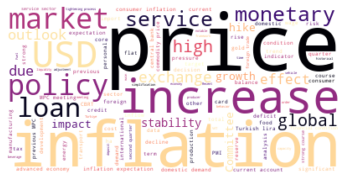

,0
inflation,59
price,47
point,43
rate,40
increase,38
...,...
normalization,1
balanced,1
visitor,1
number,1


In [8]:
def word_cloud(string):
    """
    Generate and display a word cloud based on the input string.

    Parameters:
    string (str): The input text for which the word cloud will be created.

    Returns:
    None: Displays the generated word cloud plot.
    """

    plt.axis("off")  # Turn off the axis to hide axis-related information in the plot
    plt.imshow(WordCloud(background_color="white", stopwords=stopWords, colormap="magma").generate(string), interpolation="bilinear")
    # Create the word cloud using the WordCloud class, with specified parameters:
    # - background_color: set to "white" for a white background
    # - stopwords: using the 'stopWords' set to filter out common words
    # - colormap: choose "magma" as the color map for the word cloud

    plt.show()  # Display the generated word cloud plot


a=re.sub(r'[^\w\s]', '', tagged[0].to_string().replace("\n",""))
word_cloud_plot=word_cloud(removing_digits(a))

result=pd.DataFrame(tagged[0].value_counts())
result


<AxesSubplot:ylabel='0'>

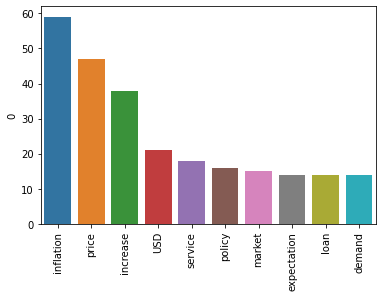

In [9]:
def freq_bar_plot(df, n):
    """
    Generate and display a frequency bar plot for the top 'n' most frequent words.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing word frequency data, usually obtained from tagged[0].value_counts().
    n (int): The number of top words to be included in the bar plot.

    Returns:
    matplotlib.axes._subplots.AxesSubplot: The bar plot representing word frequencies.
    """

    # Filter the DataFrame to include only the top 'n' most frequent words
    df = df.head(n)

    # Exclude stop words from the DataFrame (words in the 'stopWords' set) to focus on relevant words
    df = df[df.index.isin(list(stopWords)) == False]

    # Create the bar plot using Seaborn's barplot function
    my_plot = sns.barplot(data=df, x=df.index, y=0)

    # Rotate the x-axis labels for better readability
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

    # Return the generated bar plot
    return my_plot


freq_bar_plot(df=result,n=20)

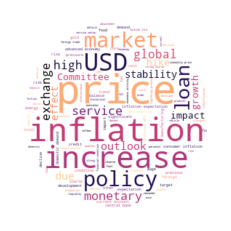

In [10]:
#Circle 
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
def word_cloud(string, mask=mask):
    plt.axis("off")
    plt.imshow(WordCloud(background_color="white", stopwords=stopWords,width = 300, height = 300,
                         colormap = "magma",mask=mask).generate(string), interpolation="bilinear")
    plt.show()


a=re.sub(r'[^\w\s]', '', tagged[0].to_string().replace("\n",""))
word_cloud_plot=word_cloud(removing_digits(a))
#result=pd.DataFrame(tagged[0].value_counts())
#result